In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import soundfile as sf

### 1. Mel filterbank (1 point)

#### a) Load the given audio file

In [10]:
s, sr = librosa.load('audio.wav', sr=None)


#### b) Create a mel filterbank using librosa

In [8]:
# sr already obtained from a)
n_fft = 512
n_mel = 40
melfb = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mel)

#### c) Plot the mel filterbank

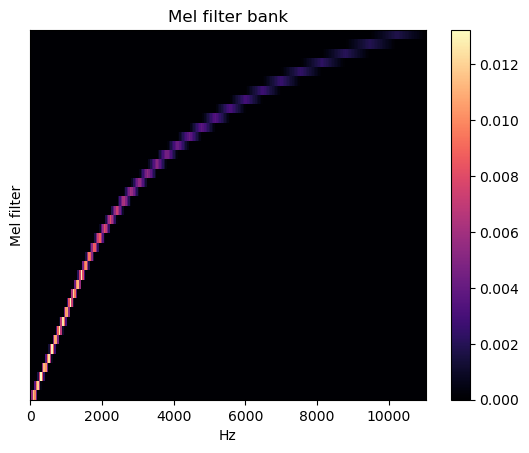

In [9]:
fig, ax = plt.subplots()

img = librosa.display.specshow(melfb, x_axis='linear', ax=ax)

ax.set(ylabel='Mel filter', title='Mel filter bank')

fig.colorbar(img, ax=ax)

#### Report your observations

The mel filterbank frequency scale grows logarithmically in relation to the frequency in hz.
The intensity is higher as the frequency lowers.

### 2. MFCC (1 point)

#### a) Pre-emphasis the audio signal

In [11]:
pre_emphasis = 0.97
s_ = np.append(s[0], s[1:] - pre_emphasis * s[:-1])

#### b) Implement a stft loop for each frame 

In [18]:
n_frames = len(s_) // n_fft
window = signal.windows.hamming(n_fft)

mfccs = np.zeros((40, n_frames), dtype=np.float32)

for i in range(n_frames):
    start = i * n_fft
    end = start + n_fft
    s_seg = s_[start:end] # Extract each frame
    if len(s_seg) < n_fft:
        break
    s_win_seg = s_seg * window # Window each frame using hamming window
    spectrum = fft(s_win_seg) # Calculate fft
    spectrum = np.abs(spectrum[:n_fft//2+1])**2 # Collect the power spectrum
    mel_spectro = np.dot(melfb, spectrum) # Multiply it with the mel filterbank
    log_mel_spectrum = 20 * np.log10(mel_spectro + 1e-10) # Take log operation
    mfcc = dct(log_mel_spectrum, type=2, axis=0, norm='ortho')[:40] # Take DCT and keep 40 coefficients
    mfccs[:, i] = mfcc # Store the MFCCs
 

#### c.1) Plot logarithmic power spectrogram

In [ ]:
# Plot logarithmic power spectrogram
fig, ax = plt.subplots()

#### c.2) Plot mel spectrogram

#### c.3) Plot logarithmic mel spectrogram

#### c.4) Plot MFCC

#### d) Implement MFCC using librosa

#### Report your observations

### Bonus problem: Implement your own mel filterbank.